Metrics:
- Sensitivity (Recall) - What % of real events got detected? $\frac{TP}{TP+FN}$
- Specificity - What % of no events got detected? $\frac{TN}{TN+FP}$
- Precision - What % of predicted events where real events? $\frac{TP}{TP+FP}$

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('40_prec_rec_attention_models.csv')
runs = ['new_baseline_BN', 'attention_none', 'attention_gates', 'attention_bottleneck']

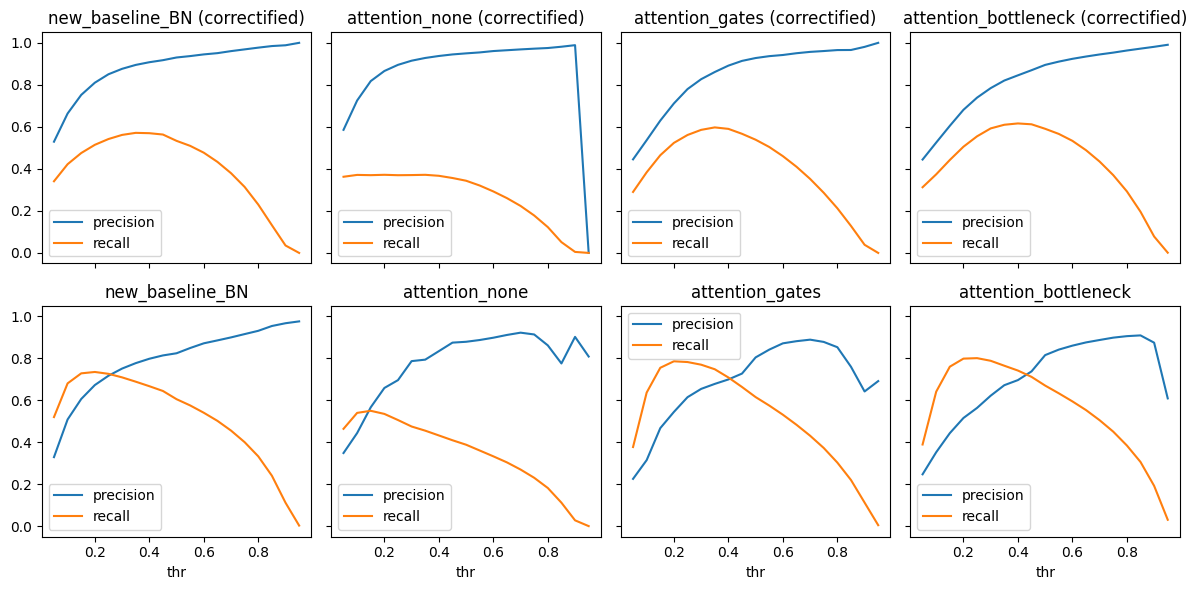

In [7]:
_, axs = plt.subplots(2, len(runs), figsize=(12, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'precision', 'recall']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

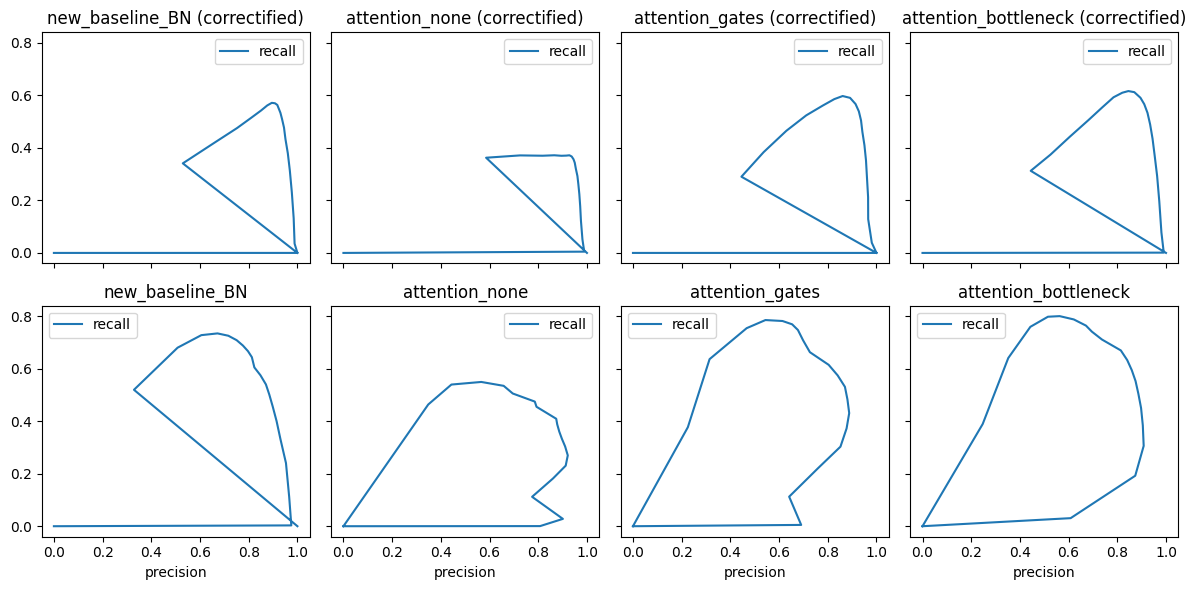

In [8]:
_, axs = plt.subplots(2, len(runs), figsize=(12, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['precision', 'recall']].set_index('precision').plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

In [9]:
data['f1'] = (2 * data['precision'] * data['recall']) / (data['precision'] + data['recall'])

In [10]:
data

,run,correctify,thr,precision,recall,f1
0,new_baseline_BN,True,0.00,1.000000,0.000010,0.000020
1,new_baseline_BN,True,0.05,0.529439,0.341101,0.414897
2,new_baseline_BN,True,0.10,0.663588,0.422272,0.516115
3,new_baseline_BN,True,0.15,0.752199,0.475516,0.582681
4,new_baseline_BN,True,0.20,0.810256,0.514595,0.629435
...,...,...,...,...,...,...
163,attention_bottleneck,False,0.80,0.904703,0.384196,0.539349
164,attention_bottleneck,False,0.85,0.908302,0.305903,0.457669
165,attention_bottleneck,False,0.90,0.873625,0.192226,0.315116
166,attention_bottleneck,False,0.95,0.608369,0.030708,0.058465


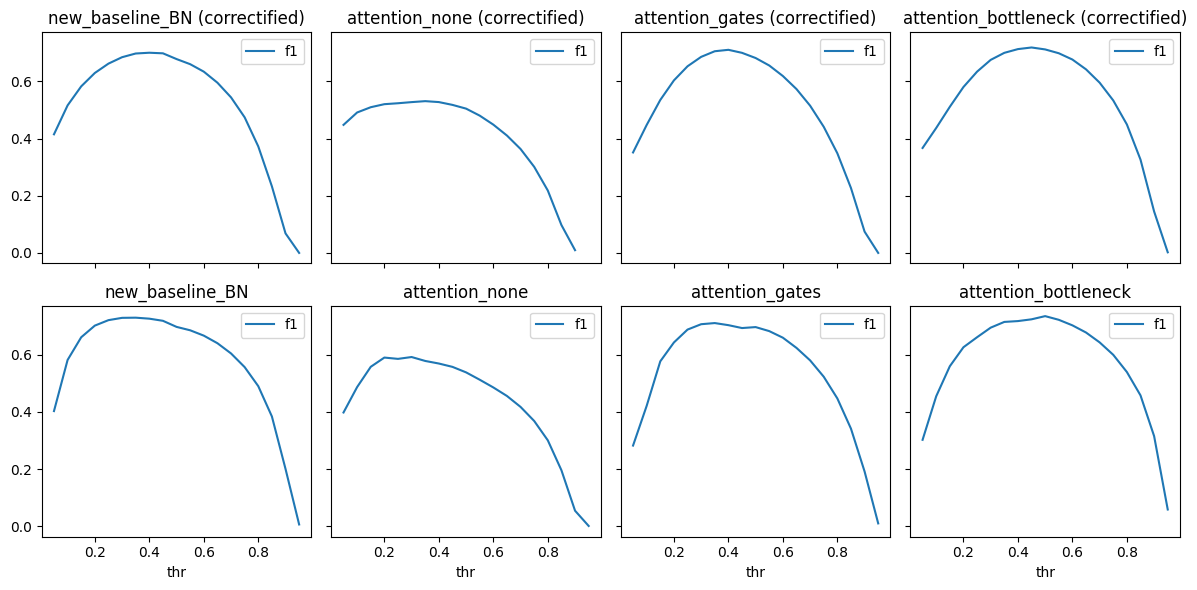

In [12]:
_, axs = plt.subplots(2, len(runs), figsize=(12, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

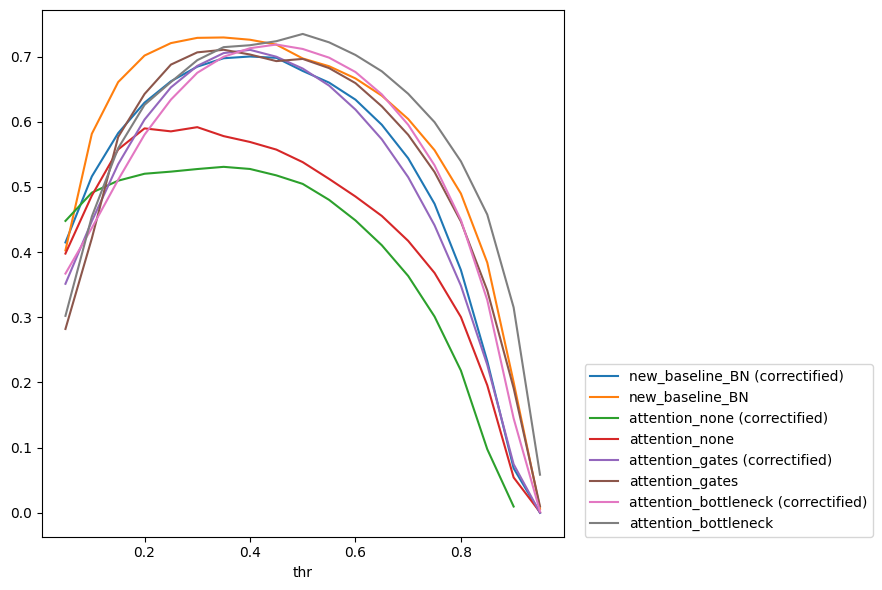

In [13]:
_, axs = plt.subplots(1, 1, figsize=(9, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{run}{' (correctified)' if correctify else ''}']
        f1_by_thr.iloc[1:20].plot(ax=axs)
plt.legend(loc=(1.04, 0))
plt.tight_layout()

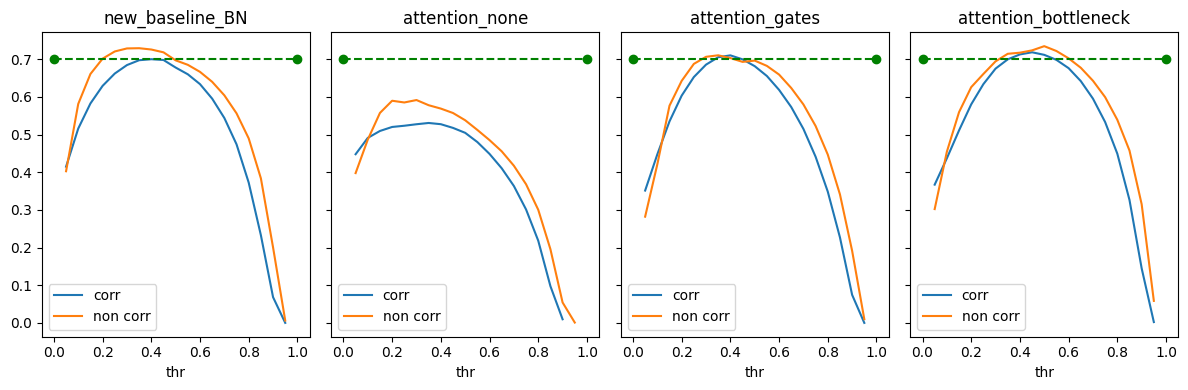

In [14]:
_, axs = plt.subplots(1, len(runs), figsize=(len(runs)*3, 4), sharex=True, sharey=True)
for i, run in enumerate(runs):
    for correctify in [True, False]:
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{'corr' if correctify else 'non corr'}']
        f1_by_thr.iloc[1:20].plot(ax=axs[i], title=run)
    axs[i].plot([0,1], [0.7]*2, color='green', linestyle='dashed', marker='o')
plt.tight_layout()